### Sumário

- Base canonica - $R^2$, base ortonormal
- Representação do vetor como combinação linear do vetores base
- Bases nao ortonormais
- Mudando de base

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Base canonica - $R^2$

 Inicialmente vamos criar os vetores para base canonica $e_1$ e $e_2$.

In [2]:
o = np.array([0, 0]).reshape(-1, 1)
e1 = np.array([1, 0]).reshape(-1, 1)
e2 = np.array([0, 1]).reshape(-1, 1)

In [3]:
e1.shape, e2.shape

((2, 1), (2, 1))

Chamamos essa base de ortonormal pois os vetores tem norma unitária e sao ortogonais, podemos verificar essas propriedades:

In [4]:
np.linalg.norm(e1), np.linalg.norm(e2), np.dot(e1.T, e2)

(1.0, 1.0, array([[0]]))

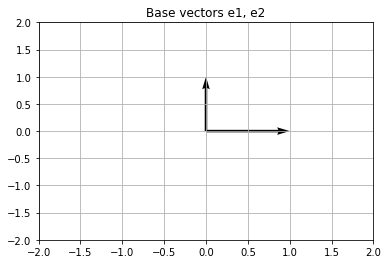

In [5]:
plt.quiver([0, 0], [0, 0], np.r_[e1[0], e2[0]], np.r_[e2[0], e2[1]], scale=1, angles='xy', scale_units='xy')
plt.ylim([-2, 2])
plt.xlim([-2, 2])
plt.title("Base vectors e1, e2")
plt.grid()

###  Representação do vetor como combinação linear do vetores base

Agora vamos escolher um vetor representado nessa base, esse vetor eh descrito com uma combinação linear dos vetores base. 

In [6]:
v = np.array([0.5, 1.5]).reshape(-1, 1)

In [7]:
v == 0.5*e1 + 1.5*e2

array([[ True],
       [ True]])

Agora projetamos o vetor nos vetores bases decompondo o vetor $v$

In [8]:
e1_coord = np.dot(v.T, e1)*e1
e1_coord

array([[0.5],
       [0. ]])

In [9]:
e2_coord = np.dot(v.T, e2)*e2
e2_coord

array([[0. ],
       [1.5]])

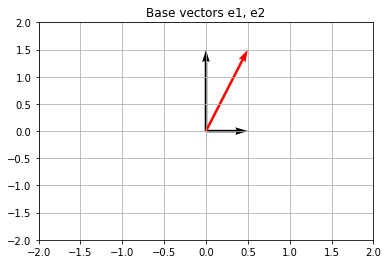

In [10]:
e_coord = np.c_[e1_coord, e2_coord].T
plt.quiver([0, 0], [0, 0], e_coord[:, 0], e_coord[:, 1], scale=1, angles='xy', scale_units='xy')
plt.quiver([0], [0], v[0], v[1], scale=1, angles='xy', scale_units='xy', color='r')
plt.ylim([-2, 2])
plt.xlim([-2, 2])
plt.title("Base vectors e1, e2")
plt.grid()

###  Base não ortonormal

Vamos agora trabalhar com duas bases $U$ e $W$ para o espaço $R^2$. Os vetores que compoem essas bases serão:

$U = {u_1, u_2} = {(2, 3)^T, (4, 5)^T}$

$W = {w_1, w_2} = {(-1, 1)^T, (1, 1)^T}$

Esses vetores representam a implementação do exemplo encontrado em:

https://eli.thegreenplace.net/2015/change-of-basis-in-linear-algebra/

In [11]:
u1 = np.array([2, 3]).reshape(-1, 1)
u2 = np.array([4, 5]).reshape(-1, 1)
w1 = np.array([-1, 1]).reshape(-1, 1)
w2 = np.array([1, 1]).reshape(-1, 1)

Para garantir que os vetores escolhidos podem ser um base para $R^2$, precisamos verificar que esses vetores nao são colineares. Podemos verificar isso calculando o produto vetorial, dividido pelas normas do vetores e verificar que o resultado eh diferente de 1.

Lembrando que $<v_1, v_2> = ||v_1 || ||v_2|| cos(\theta)$, caso $v_1$ e $v_2$ sejam colinear temos $\theta = 0$.


In [12]:
180*np.arccos(np.dot(u1.T, u2)/(np.linalg.norm(u1)*np.linalg.norm(u2)))

array([[15.61290096]])

In [13]:
180*np.arccos(np.dot(w1.T, w2)/(np.linalg.norm(w1)*np.linalg.norm(w2)))

array([[282.74333882]])

Também podemos verificar isso graficamente:

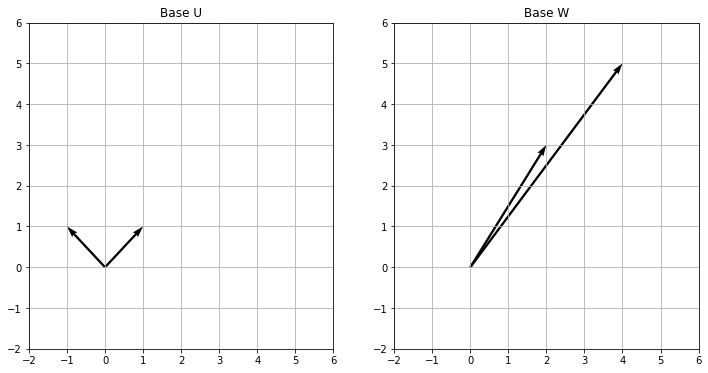

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

w_ar = np.c_[u1, u2].T
u_ar = np.c_[w1, w2].T
axs[0].quiver([0, 0], [0, 0], u_ar[:, 0], u_ar[:, 1], scale=1, angles='xy', scale_units='xy')
axs[0].set_ylim([-2, 6])
axs[0].set_xlim([-2, 6])
axs[0].set_title("Base U")
axs[0].grid()
axs[1].quiver([0, 0], [0, 0], w_ar[:, 0], w_ar[:, 1], scale=1, angles='xy', scale_units='xy')
axs[1].set_ylim([-2, 6])
axs[1].set_xlim([-2, 6])
axs[1].set_title("Base W")
axs[1].grid()

###  Mudando de base

Pare encontrarmos a matriz de mudança de base, basta escrevermos os vetores que compoem uma base em função dos que compoem a outra base. Nesse case, vamos escrever os vetores da base $U$ em termos dos vetores da base $W$.

Para isso, calculamos a projeção de $u_1, u_2$ em $w_1, w_2$.

In [15]:
UW11 = np.dot(u1.T, w1)/np.dot(w1.T, w1)
UW11

array([[0.5]])

In [16]:
UW12 = np.dot(u1.T, w2)/np.dot(w2.T, w2)
UW12

array([[2.5]])

In [17]:
u1 == UW11*w1 + UW12*w2

array([[ True],
       [ True]])

$u_1$ como combinação de $w_1$ e $w_2$

In [18]:
UW21 = np.dot(u2.T, w1)/np.dot(w1.T, w1)
UW21

array([[0.5]])

In [19]:
UW22 = np.dot(u2.T, w2)/np.dot(w2.T, w2)
UW22

array([[4.5]])

$u_2$ como combinação de $w_1$ e $w_2$

In [20]:
u2 == UW21*w1 + UW22*w2

array([[ True],
       [ True]])

Assim a matriz de mudançao de base de $W$ para $U$ é:

In [21]:
UW = np.array(np.c_[np.r_[UW11, UW12], np.r_[UW21, UW22]])
UW

array([[0.5, 0.5],
       [2.5, 4.5]])

E a matriz de mudançao de base de $U$ para $W$ é:

In [22]:
WU = np.linalg.inv(UW)
WU

array([[ 4.5, -0.5],
       [-2.5,  0.5]])

###  Representação em diferentes bases

Partindo de um vetor $v$ escrito na base $U$, este será mapeado para a base $W$ multiplicando pela matriz de mudança de base.

In [23]:
V_u = np.array([1, 3]).reshape(-1, 1)

In [24]:
V_u

array([[1],
       [3]])

Vetor na base $W$:

In [25]:
V_w = np.dot(WU, V_u)

In [26]:
V_w

array([[ 3.],
       [-1.]])

Voltando para a base $U$.

In [27]:
V_u == np.dot(UW, V_w)

array([[ True],
       [ True]])